<div class="alert alert-block alert-success" markdown=1>
<hr>
MARVEL UNIVERSE PROJECT
<hr>
</div>

# Web Scraping, APIs, JSONS, Sets, and Simple Statistics

<div class="alert alert-block alert-info">
From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
<ol>
    <li> Find the number of superheroes in the Marvel universe. </li>
    <li> Find the number of supervillains in the Marvel universe. </li>
    <li> Find the number of characters that are both heroes and villains. Compute the Jaccard similarity between the two groups. </li>
    </ol>
</div>


In [3]:
# Extract characters from wikipedia using cmcontinue

import requests as rq
import numpy as np

def extract(category):
    cmc = True
    c = ""
    r = []
    while cmc:
        query = "http://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:"+str(category)+"&cmlimit=500&cmcontinue="+str(c)
        response = rq.get(query)
        rt = response.json()
        r = r + rt["query"]["categorymembers"]
        try:
            c = str(rt["continue"]["cmcontinue"])
        except:
            return r
    return None

In [4]:
# Getting characters from each category (superheroes and supervillains)

superheroes = extract("Marvel_Comics_superheroes")
print("superheroes:", len(superheroes))

supervillains = extract("Marvel_Comics_supervillains")
print("supervillains:", len(supervillains))


superheroes: 773
supervillains: 1004


In [5]:
# Removing false entries from the bottom of the page, making lists of characters

sh = [superheroes[i]['title'] for i in range(len(superheroes)) if superheroes[i]['title'].find('Category:') == -1]
print("superheroes:", len(sh))

sv = [supervillains[i]['title'] for i in range(len(supervillains)) if supervillains[i]['title'].find('Category:') == -1]
print("supervillains:", len(sv))


superheroes: 767
supervillains: 997


In [6]:
# How many characters are both superheroes and supervillains --> Jaccard similarity

set_sh = set(sh)
set_sv = set(sv)

intersection = set_sh.intersection(set_sv)
union = set_sh.union(set_sv)

heroes = set_sh.difference(set_sv)
villains = set_sv.difference(set_sh)
ambiguous = intersection

print("number of heroes: %d" % len(heroes))
print("number of villains: %d" % len(villains))
print("ambiguous (heroes that are also villains): %d" % len(ambiguous))
print("total number of characters: %d" % len(union))

jaccard_similarity = len(intersection) / len(union)
print("Jaccard Similarity: %0.3f" %(jaccard_similarity))

number of heroes: 622
number of villains: 852
ambiguous (heroes that are also villains): 145
total number of characters: 1619
Jaccard Similarity: 0.090


# Visualizations

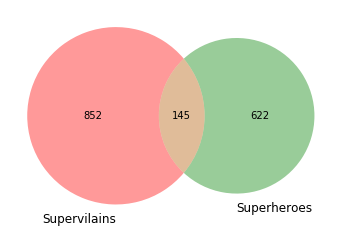

In [7]:
# Venn Diagram visualization of the size of the sets

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
venn2(subsets = (len(villains), len(heroes), len(ambiguous)), set_labels = ('Supervilains', 'Superheroes'))
plt.show()


<div class="alert alert-block alert-info">
Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can we say anything about the popularity of characters in the Marvel universe based on the visualization?
</div>

<div class="alert alert-block alert-danger">
NOTE: I have moved 3 directories into my local directory containing the scraped data for each character page on Wikipedia.
I pre-loaded them simply to save time, but the code is commented out below if you would like to see how I did it.
</div>

In [ ]:
'''
def first_val_of_dict(dict):
    count = 0
    for k, v in dict.items():
        if (count == 0):
            return k
        
dirs = [heroes, villains, ambiguous]
dir_names = ['heroes', 'villains', 'ambiguous']

for i in range(len(dirs)):
    os.chdir('/Users/sejaldua/Desktop/DIS/Big Data/big-data/')
    os.chdir(dir_names[i])
    print(dir_names[i])
    count = 0
    for title in dirs[i]:
        print(count, title)
        count += 1
        data = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&titles="+title+"&prop=revisions&rvprop=content").json()
        mu_str = data['query']['pages'][first_val_of_dict(data['query']['pages'])]['revisions'][0]['*']
        
        # replacing slashes with a meaningful character for file-writing purposes
        title = title.replace("/", "-")
        
        # for some reason, i did not need to encode my string
        #mu_str = mu_str.encode('utf-8')

        with open(title + '.txt', 'w') as f:
            f.write(str(mu_str))
'''

In [8]:
# Extract page length of each character

import glob

def extract_lengths(folder):
    pg_len = []
    char = []
    for filename in glob.glob(str(folder) + "/*.txt"):
        f = open(filename, 'r')
        content = f.read()
        pg_len.append(len(content))
        char.append(filename[filename.index('/')+1:filename.index('.')])
        f.close()
    return pg_len, char

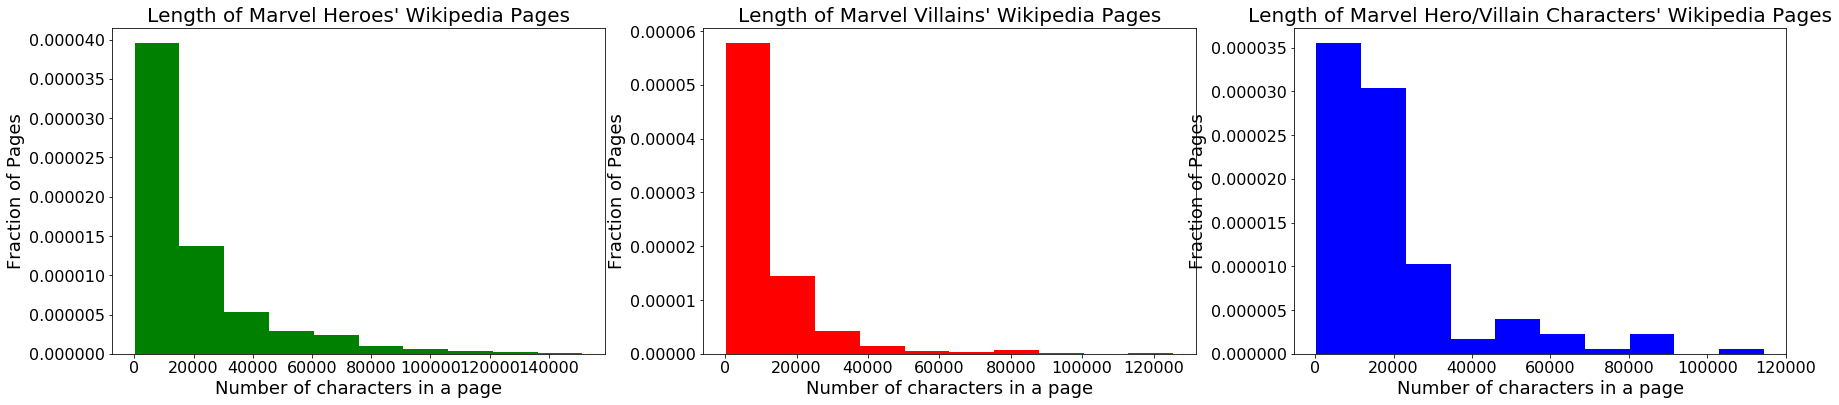

In [9]:
# Plot distribution of page length for each class of characters

plt.figure(figsize=(30, 6))

# collect data
h_len, h_char = extract_lengths("heroes")
v_len, v_char = extract_lengths("villains")
a_len, a_char = extract_lengths("ambiguous")

# subplot 1: heroes' page lengths
plt.subplot(1,3,1)
plt.hist(h_len, density=True, color='g')
plt.xlabel("Number of characters in a page", fontsize=18)
plt.ylabel("Fraction of Pages", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Length of Marvel Heroes' Wikipedia Pages", fontsize=20)

# subplot 2: villains' page lengths
plt.subplot(1,3,2)
plt.hist(v_len, density=True, color='r')
plt.xlabel("Number of characters in a page", fontsize=18)
plt.ylabel("Fraction of Pages", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Length of Marvel Villains' Wikipedia Pages", fontsize=20)

# subplot 3: ambiguous page lengths
plt.subplot(1,3,3)
plt.hist(a_len, density=True, color='b')
plt.xlabel("Number of characters in a page", fontsize=18)
plt.ylabel("Fraction of Pages", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Length of Marvel Hero/Villain Characters' Wikipedia Pages", fontsize=20)

plt.show()

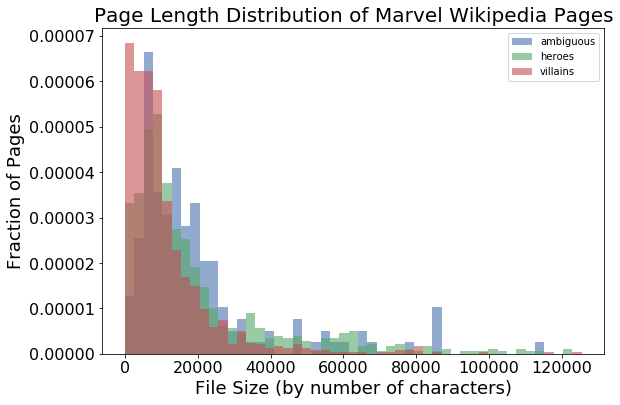

In [10]:
# Alternate visualization of page distribution by character class

plt.style.use('seaborn-deep')
plt.figure(figsize=(9, 6))

# plotting
bins = np.linspace(0, max(max(h_len, v_len, a_len)), 50)
plt.hist(a_len, bins, alpha=0.6, density=True, label='ambiguous')
plt.hist(h_len, bins, alpha=0.6, density=True, label='heroes')
plt.hist(v_len, bins, alpha=0.6, density=True, label='villains')
plt.legend(loc='upper right')

# formatting
plt.xlabel('File Size (by number of characters)', fontsize=18)
plt.ylabel('Fraction of Pages', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Page Length Distribution of Marvel Wikipedia Pages', fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
<ol>
<li> Find the 10 characters from each class with the longest Wikipedia pages. </li>
<li> Visualize their page lengths with bar charts.  </li>
<li> Comment on the result. </li>
</ol>
</div>

In [11]:
# Find top 10 characters with longest page lengths

def find_top_10(c, p):
    char = c.copy()
    pg_num = p.copy()
    top_10l = []
    top_10c = []
    for x in range(10):
        a = max(pg_num)
        i = pg_num.index(a)
        top_10l.append(pg_num[i])
        top_10c.append(char[i])
        pg_num.remove(pg_num[i])
        char.remove(char[i])
    return top_10l, top_10c

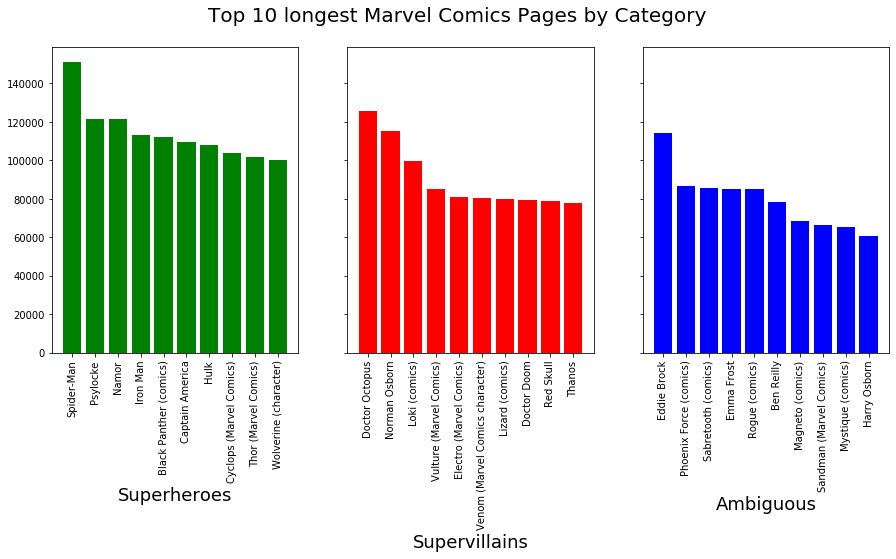

In [12]:
# Visualize page lengths with bar charts

# collect data
h_len10, h_char10 = find_top_10(h_char, h_len)
v_len10, v_char10 = find_top_10(v_char, v_len)
a_len10, a_char10 = find_top_10(a_char, a_len)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5.625), sharey = True)

# ax1: top 10 superhero page lengths
ax1.bar(h_char10, h_len10, color='g')
ax1.set_xlabel("Superheroes", fontsize = 18)
plt.setp(ax1.get_xticklabels(), rotation=90)

# ax2: top 10 supervillain page lengths
ax2.bar(v_char10, v_len10, color='r')
ax2.set_xlabel("Supervillains", fontsize = 18)
plt.setp(ax2.get_xticklabels(), rotation=90)

# ax 3: top 10 ambiguous page lengths
ax3.bar(a_char10, a_len10, color='b')
ax3.set_xlabel("Ambiguous", fontsize = 18)
plt.setp(ax3.get_xticklabels(), rotation=90)

fig.suptitle("Top 10 longest Marvel Comics Pages by Category", fontsize = 20)

plt.show()


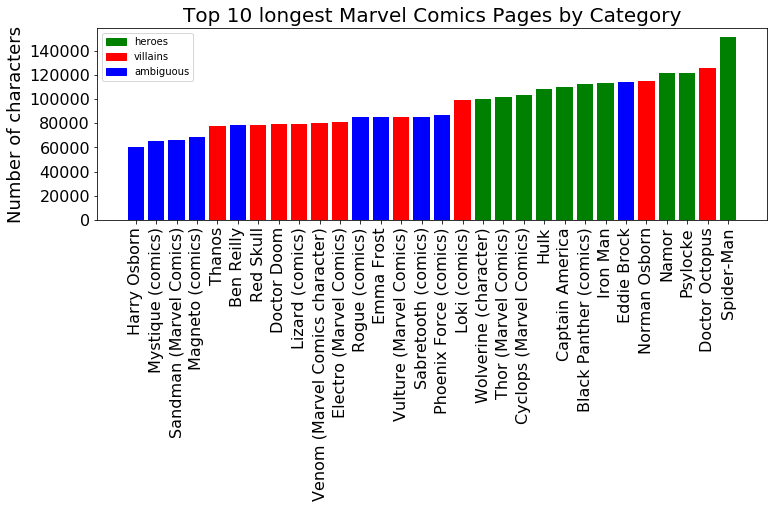

In [13]:
# Visualize page lengths with a joint bar chart

import matplotlib.patches as mpatches

plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
titles = h_char10 + v_char10 + a_char10
chars = h_len10 + v_len10 + a_len10
classes = [(i // 10) for i in range(30)]
sorted_indices = sorted(range(len(chars)), key = lambda i: chars[i])
titles = [titles[i] for i in sorted_indices]
chars = [chars[i] for i in sorted_indices]
classes = [classes[i] for i in sorted_indices];
colors = []
for c in classes:
    if (c == 0):
        colors.append('green')
    elif (c == 1):
        colors.append('red')
    elif (c == 2):
        colors.append('blue')
plt.bar(titles, chars, color=colors);
plt.xticks(rotation=90);

# formatting
plt.ylabel('Number of characters', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 longest Marvel Comics Pages by Category', fontsize=20)

h = mpatches.Patch(color='green', label='heroes')
v = mpatches.Patch(color='red', label='villains')
a = mpatches.Patch(color='blue', label='ambiguous')
plt.legend(handles=[h, v, a])

plt.show()


<div class="alert alert-block alert-success">    
The joint bar graph of all classes of characters above tell us that, when sorting the top 10 longest pages for each class by characters, heroes are *still* the most written-up. `Spider-Man` has the longest overall page, followed by 6 other superheroes in the top 10 overall. The order of page lengths by class goes heroes, villains, then ambiguous. Perhaps ambiguous characters are not interesting to write about because they are neutral and kind of boring in that sense. 

As well, for both superheroes and ambiguous characters, there is a big drop between the first and second longest pages, and from there the distribution becomes much flatter. The supervillain distribution has a steady drop between first/second/third longest pages, and from there the distribution becomes much flatter. The top supervillain and ambiguous character pages are far shorter than the top superhero page.
    </div>

<div class="alert alert-block alert-info">
We are interested in knowing if there is a time-trend in the debut of characters.
<ol>
<li> Extract into three lists, debut years of heroes, villains, and ambiguous characters. </li>
<li> Do all pages have a debut year? Do some have multiple? </li>
<li> For each class, visualize the amount of characters introduced over time. </li>
</ol>
</div>

In [14]:
# Extract debut years

import glob
import os
import re

def extract_debut_years(folder):
    debut_years = []
    for filename in glob.glob(str(folder) + "/*.txt"):
        with open(filename, 'r') as f:
            content = f.read()

        try:
            # this line gets all years after the word "debut" in the text file
            d_years = re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", content)[0])

            # gets the first year (oldest) in the list of debut years for current character
            # then chops off the end parenthesis from the string
            year = d_years[0][:-1]
            year = int(year)
        except:
            continue
        debut_years.append(year)
    return debut_years

dir_names = ['heroes', 'villains', 'ambiguous']
debut_years = []

# traverse the directories, calling extract_debut_years function
for i in range(len(dir_names)):
    debut_years.append(extract_debut_years(dir_names[i]))


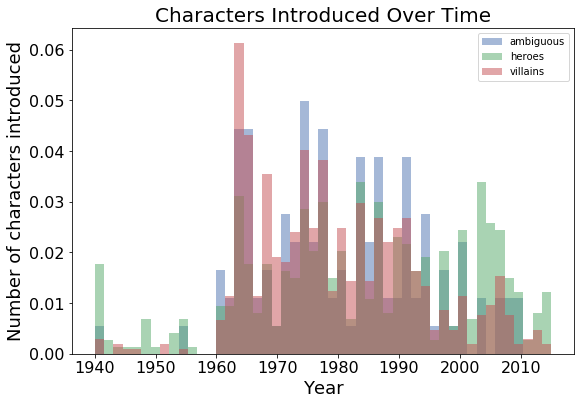

In [15]:
# Visualize time-trend in the debut of characters

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-deep')

plt.figure(figsize=(9, 6))

h_years = debut_years[0]
v_years = debut_years[1]
a_years = debut_years[2]

bins = np.linspace(min(min(h_years, v_years, a_years)), max(max(h_years, v_years, a_years)), 50)

plt.hist(a_years, bins, alpha=0.5, density=True, label='ambiguous')
plt.hist(h_years, bins, alpha=0.5, density=True, label='heroes')
plt.hist(v_years, bins, alpha=0.5, density=True, label='villains')
plt.legend(loc='upper right')

# formatting
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of characters introduced', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Characters Introduced Over Time', fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
Our analysis shows that generally, less characters are being debuted (for the first time) as time goes on. This tells us that Marvel is not actively creating many new superheroes and supervillains these days since we can see a general downward trend in the density histogram. We can also see that, with respect to the other classes of characters, heroes have been introduced into the Marvel world at a relatively constant rate, including a pretty high frequency in the past two decades. The peak years for supervillains being introduced were the 1960's and '70's.
</div>

# Machine Learning

## Feature Representation

<div class="alert alert-block alert-info">
In it's raw format, the data cannot be given to a machine learning algorithm. What we must do is extract features from the data and put them into a structured format. 
The feature we will extract here is <b>team alliances</b>.

We can represent the team alliances of each character as a row in a matrix where each column corresponds to a particular team. That should look something like this (numbers are made up):
    
<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_boa.png" width="400"/>
</div>

<div class="alert alert-block alert-info">
<ol>
<li> Write a function called `get_alliances` that takes the name of a character and returns a list of teams that the character is allied with. </li>
<li> Print the top 10 alliances of <b>Iron Man</b>. </li>
</ol>
</div>

In [19]:
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+?=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

In [20]:
# Print the top 10 alliances of Iron Man

get_alliances("Iron Man")

['Avengers (comics)',
 'United States Department of Defense',
 'Force Works',
 'The New Avengers (comics)',
 'Guardians of the Galaxy (2008 team)',
 'Illuminati (comics)',
 'The Mighty Avengers',
 'S.H.I.E.L.D.',
 'Stark Industries',
 'Stark Resilient',
 'Thunderbolts (comics)']

<div class="alert alert-block alert-info">
<ol>
<li> Produce a sorted list called <b>all_teams</b> that contains all teams in the entire Marvel universe. </li>
<li> Print the first 10. </li>
</ol>
</div>

In [21]:
all_teams = []
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("%s" % faction)]
    for char in faction_chars:
         # Load character markup
        with open("%s/%s.txt" % (faction, char)) as fp:
            markup = fp.read()

        # Get alliance field
        alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
        if alliances_field == []:
            continue

        # Extract teams from alliance field and add to master list if not already there
        teams = [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]
        for team in teams:
             if team not in all_teams:
                    all_teams.append(team)

# Sort teams alphabetically and print the first 10 teams
all_teams.sort()
print(all_teams[0:10])

['A-Force', 'A-Next', 'A.R.M.O.R.', 'AXIS (comics)', 'Acolytes (comics)', 'Acts of Vengeance', 'Advanced Idea Mechanics', 'Advanced Idea Mechanics#Avengers Idea Mechanics', 'Age of Apocalypse', 'Agency X']


<div class="alert alert-block alert-info">
<ol>
<li> Write a function that takes the name of a character and returns a vector representation of the team alliances for that character. 
The length of the returned list will be <b>len(all_teams)</b> and have 0s in the places corresponding to teams that the character is not on, and 1s in the places corresponding to teams the character is on.</li>
<li> Print the sum of the list returned when the input to the function is Iron man. </li>
</ol>
</div>

In [22]:
def get_vector(char):
    char_teams = get_alliances(char)
    return [1 if team in char_teams else 0 for team in all_teams]
        
print(sum(get_vector('Iron Man')))

11


<div class="alert alert-block alert-info">
<ol>
<li> Create the team alliance matrix for the data. This is our feature matrix for the classification problem. </li>
<li> Print the shapes of your matrix and target array.</li>
</ol>
</div>

In [24]:
import numpy as np

characters = []
y_ta = []
X_ta = []
for faction in ["heroes", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("%s" % faction)]
    for char in faction_chars:
        alliance_vec = get_vector(char)
        
        # Only add character to the feature matrix if the character has alliances
        if sum(alliance_vec) > 0:
            
            # Build a 2D alliance matrix vector-by-vector for each character
            X_ta.append(alliance_vec)
            
             # Enter 1 or 0 into classification vector target array
            if faction == "heroes":
                y_ta.append(1)
            else:
                y_ta.append(0)

print("Shape of matrix array:", np.shape(X_ta))
print("Shape of target array:", np.shape(y_ta))

Shape of matrix array: (1056, 613)
Shape of target array: (1056,)


## Model Fitting

<div class="alert alert-block alert-info">
Train a classifier model on all data and test its accuracy.
<br>
<br>
The BernoulliNB is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. 
Other popular classifiers are trees, random forests, support vector machines, feed forward neural networks, logistic regression, 
and the list goes on. With sklearn, they are just as easy to employ as the BernoulliNB classifier.
<br>
<br>
Test the accuracy of the model by reporting the accuracy of trained model alongside the baseline accuracy of a "dumb" model that only guesses for the majority class.
Report the precision, recall and F1 scores, with respect to the minority class (heroes).
</div>

In [25]:
# Test accuracy of model(s)

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_ta, y_ta)
y_pred = model.predict(X_ta)
print("Number of heroes in classification vector:", sum(y_ta))
print("Number of villains in classification vector:", len(y_ta)-sum(y_ta))
print("Number of total characters in dataset:", len(y_ta))
print("Accuracy of model:", round(sum([y_pred[i] == y_ta[i] for i in range(len(y_ta))])/len(y_ta), 3))
print("Baseline accruacy of \"dumb\" model:", round(sum([y_ta[i]==0 for i in range(len(y_ta))])/len(y_ta), 3))

Number of heroes in classification vector: 525
Number of villains in classification vector: 531
Number of total characters in dataset: 1056
Accuracy of model: 0.936
Baseline accruacy of "dumb" model: 0.503


In [26]:
def print_confusion_matrix(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")

    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [27]:
# Exercise 4.2.1.2: report precision, recall, and F1 scores with respect to minary class (heroes)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

print("SKLEARN REPORT")

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_ta, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_ta, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_ta, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_ta, y_pred)
print('F1 score: %f' % f1)

# Rate of Change Area Under Curve
auc = roc_auc_score(y_ta, y_pred)
print('ROC AUC: %f' % auc)

# Confusion Matrix
matrix = confusion_matrix(y_ta, y_pred)
print('Confusion Matrix\n')
print_confusion_matrix(matrix, labels=['heroes', 'villains'])

SKLEARN REPORT
Accuracy: 0.935606
Precision: 0.963489
Recall: 0.904762
F1 score: 0.933202
ROC AUC: 0.935432
Confusion Matrix

       t/p     heroes villains 
      heroes    513.0     18.0 
    villains     50.0    475.0 


In [28]:
# Splitting the data into testing and training sets (of equal size) and run the model again

import random
from sklearn.model_selection import train_test_split

# randomize the datapoints to avoid getting unbalanced class proportions
random_indices = [i for i in range(len(y_ta))]
random.shuffle(random_indices)
alliance_mtx = [X_ta[idx] for idx in random_indices]
class_vec = [y_ta[idx] for idx in random_indices]

# split the data in half and check the shapes
xTrain, xTest, yTrain, yTest = train_test_split(alliance_mtx, class_vec, test_size = 0.5, random_state = 0)
print(np.shape(xTrain), np.shape(yTrain), np.shape(xTest), np.shape(yTest), end="\n\n")

model = BernoulliNB()
model.fit(xTrain, yTrain)
y_train_pred = model.predict(xTrain)
y_test_pred = model.predict(xTest)

print("Accuracy of model on train data:", round(sum([y_train_pred[i] == yTrain[i] for i in range(len(yTrain))])/len(yTrain), 3))
print("Baseline accruacy of \"dumb\" model on train data:", round(sum([yTrain[i]==0 for i in range(len(yTrain))])/len(yTrain), 3))

print("\nAccuracy of model on test data:", round(sum([y_test_pred[i] == yTest[i] for i in range(len(yTest))])/len(yTest), 3))
print("Baseline accruacy of \"dumb\" model on test data:", round(sum([yTest[i]==0 for i in range(len(yTest))])/len(yTest), 3))

(528, 613) (528,) (528, 613) (528,)

Accuracy of model on train data: 0.92
Baseline accruacy of "dumb" model on train data: 0.472

Accuracy of model on test data: 0.852
Baseline accruacy of "dumb" model on test data: 0.534


## Model Evaluation

<div class="alert alert-block alert-info">
Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. 
If we rerun the code multiple times, with random 50/50 partitions, we are gonna see a lot of uncertainty in performance. 
Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average 
performance over K-folds of this process.
<br>
<ol>
<li> Implement cross validation over 𝐾=10 folds. For each fold, record the training and test accuracies. </li>
<li> Visualize the distributions of test and training accuracy as histograms in the same plot. </li>
</ol>
</div>

In [29]:
from sklearn.model_selection import KFold

# initializing our performance accuracy lists
accuracy_train = []
accuracy_test = []

# creating the KFold cross-validation splits
cv = KFold(n_splits=10, random_state=42, shuffle=False)

# we can only perform scalar indexing on an array of integers, not a list
alliance_arr = np.array(alliance_mtx)
class_arr = np.array(class_vec)

for train_index, test_index in cv.split(alliance_arr):
    
    # the debug statement below helps us verify that we have non-overlapping groups
    # print("Test Index: ", test_index)
    
    # split the data via provided arrays of indices
    xTrain, xTest = alliance_arr[train_index], alliance_arr[test_index]
    yTrain, yTest = class_arr[train_index], class_arr[test_index]
    
    # fit the model and obtain our predictions
    model = BernoulliNB()
    model.fit(xTrain, yTrain)
    y_train_pred = model.predict(xTrain)
    y_test_pred = model.predict(xTest)

    # append performance accuracy to a list for this fold / iteration of the cross-validation
    accuracy_train.append(sum([y_train_pred[i] == yTrain[i] for i in range(len(yTrain))])/len(yTrain))
    accuracy_test.append(sum([y_test_pred[i] == yTest[i] for i in range(len(yTest))])/len(yTest))

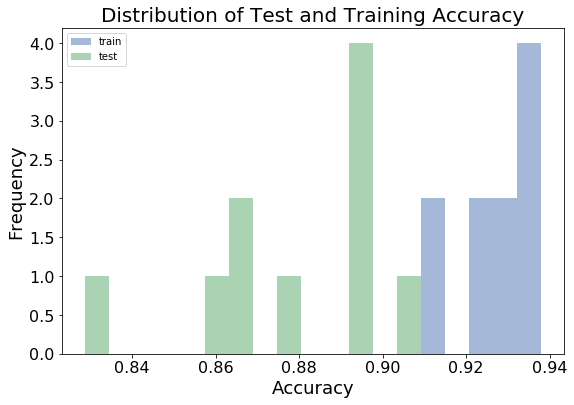

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(9,6))
bins = np.linspace(min(min(accuracy_train, accuracy_test)), max(max(accuracy_train, accuracy_test)), 20)
plt.hist(accuracy_train, bins, alpha=0.5, label='train')
plt.hist(accuracy_test, bins, alpha=0.5, label='test')

# figure formatting
plt.legend(loc='upper left')
plt.xlabel('Accuracy', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Test and Training Accuracy', fontsize=20)
plt.show()

## Decision Trees

<div class="alert alert-block alert-info">
Shannon entropy measures the amount of uncertainty represented by a probability distribution. It is essentially the number of bits (on average) required to encode each source element without loss in transmission. It is defined mathematically as:
    <br>
$$H(X) = -\sum_i^nP(x_i)\log_b P(x_i)$$
</div>

In [31]:
import math
def entropy(v):
    if 0 in v:
        return 0
    return sum([-i * math.log(i, 2) for i in v])

<div class="alert alert-block alert-info">
Split data into two subsets, one where characters are affiliated with X-men and one where they are not.
<ol>
<li> What is the entropy of target labels in each subset? </li>
<li> What is the weighted average entropy of the split? </li>
<li> Write a function that computes the weighted average entropy of a split, given the data and team (name or id) on which to split the data. </li>
<li> Plot the distribution of split entropy for all features. </li>
</ol>
</div>

In [34]:
all_teams.sort()
alliance_matrix = X_ta
class_vec = y_ta
                
print(np.shape(alliance_matrix), np.shape(class_vec))
orig_alliance_matrix = alliance_matrix
orig_class_vec = class_vec

(1056, 613) (1056,)


In [36]:
# Entropy of target labels in each subset
# Weighted average entropy of the split
# Write function that computes the weighted average entropy of a split, given the data and team on which to split the data

def compute_entropy_vals(in_alliance, is_hero):
    proportions = [sum(in_alliance)/len(in_alliance), (len(in_alliance)-sum(in_alliance))/len(in_alliance)]
    in_alliance_count = sum(in_alliance)
    not_in_alliance_count = len(in_alliance)-sum(in_alliance)
    in_alliance_and_hero = sum([1 if (in_alliance[i] == 1 and is_hero[i] == 1) else 0 for i in range(len(in_alliance))])/in_alliance_count
    v1 = [in_alliance_and_hero, 1-in_alliance_and_hero]
    not_in_alliance_and_hero = sum([1 if (in_alliance[i] == 0 and is_hero[i] == 1) else 0 for i in range(len(in_alliance))])/not_in_alliance_count
    v2 = [not_in_alliance_and_hero, 1-not_in_alliance_and_hero]
    weighted_entropy = proportions[0]*entropy(v1) + proportions[1]*entropy(v2)
    return weighted_entropy, entropy(v1), entropy(v2)

def get_entropy_info(mtx, class_vec, alliance_split):
    in_alliance = []
    is_hero = []
    for i in range(len(mtx)):
        if mtx[i][all_teams.index(alliance_split)] == 1:
            in_alliance.append(1)
        else:
            in_alliance.append(0)
        
        if class_vec[i] == 1:
            is_hero.append(1)
        else:
            is_hero.append(0)
            
    weighted_entropy = 1
    if (sum(in_alliance) > 0):
        weighted_entropy, split_in, split_out = compute_entropy_vals(in_alliance, is_hero)
        
    return weighted_entropy, sum(in_alliance), split_in, len(mtx)-sum(in_alliance), split_out
     
def weighted_avg_entropy_of_split(mtx, class_vec, alliance_split):
    in_alliance = []
    is_hero = []
    for i in range(len(mtx)):
        if mtx[i][all_teams.index(alliance_split)] == 1:
            in_alliance.append(1)
        else:
            in_alliance.append(0)
        
        if class_vec[i] == 1:
            is_hero.append(1)
        else:
            is_hero.append(0)
            
    weighted_entropy = 1
    if (sum(in_alliance) > 0):
        weighted_entropy, split_in, split_out = compute_entropy_vals(in_alliance, is_hero)
        
    return weighted_entropy
    
# running the function for X-Men
weighted, _, split_entropy_in, _, split_entropy_out = get_entropy_info(alliance_matrix, class_vec, "X-Men")
print("1. Entropy Splits \n " +
      "in X-Men: " + str(round(split_entropy_in, 4)) + "\n " +
      "not in X-Men: " + str(round(split_entropy_out, 4)) + "\n")

print("2. Weighted average entropy of each split for X-Men alliance:", round(weighted, 4))


1. Entropy Splits 
 in X-Men: 0.3744
 not in X-Men: 0.9955

2. Weighted average entropy of each split for X-Men alliance: 0.9467


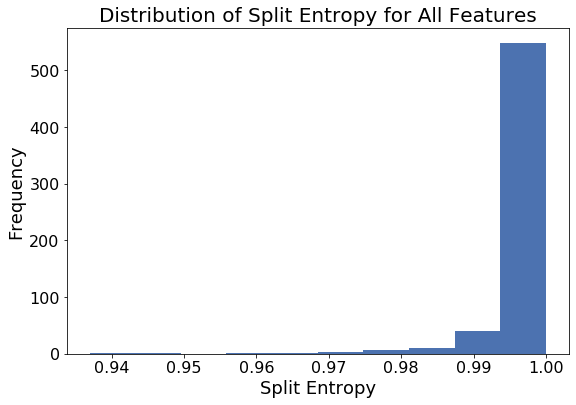

In [37]:
#Plot the distribution of split entropy for all features

import matplotlib.pyplot as plt

entropies = []
for team in all_teams:
    entropies.append(weighted_avg_entropy_of_split(alliance_matrix, class_vec, team))  
    
# sanity check
# print(list(zip(all_teams, entropies)))

fig = plt.figure(figsize=(9,6))
plt.hist(entropies);

# figure formatting
plt.xlabel('Split Entropy', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of Split Entropy for All Features', fontsize=20)
plt.show()

<div class="alert alert-block alert-success">
We can see in the figure above that the split entropies are very high for all features. One important thing to notice with the histogram is that we have let matplotlib automatically scale the x axis. There are only 8 bins and they are condensed to the 0.93-1.00 region. This tells us that the features we have used (alliances) have a lot of informative power in classifying Marvel characters into one of two classes: superheroes or supervillains. We can infer from this that our decision tree machine learning model can do an excellent job at helping us make predictions about the ambiguous characters in the dataset because alliances typically contain all heroes or all villains according to these high entropy values.
</div>

<div class="alert alert-block alert-info">
<ol>
<li> Print the maximum entropy path of a decision tree.
<br>
<ul>
<li> Step 1. Find <b>team</b> that gives lowest split entropy for <b>data</b>. Print team.</li>
<li> Step 2. Split <b>data</b> on <b>team</b>, to produce <b>data0</b> and <b>data1</b>. Print the entropy of each, as well as their weighted avg. entropy.</li>
<li> Step 3. Overwrite the <b>data</b> variable with either <b>data0</b> or <b>data1</b>, depending on which has the highest entropy.</li>
<li> Step 4. Stop if there are less than 5 datapoints in <b>data</b>. Otherwise start over from 1.</li>
</ul>
<li> How splits are there? Anything interesting about the final splits? Why do we choose to stop splitting before data get smaller than 5? </li>
<li> Train a <b>sklearn.tree.DecisionTreeClassifier</b> classifier on the dataset. Initiate the classifier with <b>criterion='entropy'</b>. 
<br>
<ul>
<li> What are the most important features of this classifier? </li>
<li> How does this line up with the order of the order of splits we just printed? </li>
</ul>
</ol>
</div>

In [39]:
alliance_matrix = orig_alliance_matrix
class_vec = orig_class_vec

# Exercise 5.1.3.4: loop the work you have done for 5 splits to produce the maximum entropy path of the decision tree
for i in range(5):
    
    # Exercise 5.1.3.1: lowest split entropy --> team
    entropies = []
    for team in all_teams:
        entropies.append(weighted_avg_entropy_of_split(alliance_matrix, class_vec, team))  
    min_index = entropies.index(min(entropies))
    team = all_teams[min_index]
    print("-" * (5+3+3+len(team)))
    print("Split", i, ":", team)
    print("-" * (5+3+3+len(team)))

    # Exercise 5.1.3.2: split data on team --> print respective entropies and weighted
    weighted, size_data0, entropy_in, size_data1, entropy_out = get_entropy_info(alliance_matrix, class_vec, team)
    print("data0:")
    print("  size:", size_data0)
    print("  entropy:", round(entropy_in, 3))
    print("data1:")
    print("  size:", size_data1)
    print("  entropy:", round(entropy_out, 3))
    print("WEIGHTED AVG ENTROPY:", round(weighted, 3))

    # Exercise 5.1.3.3: overwrite alliance matrix data with higher entropy subset
    # note: this requires defining the data to include all characters except those that belong in the Avengers alliance
    if (entropy_out > entropy_in):
        val = 0
    else:
        val = 1

    # alliance matrix is a list of character vectors
    new_alliance_matrix = []
    new_class_vec = []
    for j in range(len(alliance_matrix)):
        vec = alliance_matrix[j]
        flag = False
        for i in range(len(vec)):
            if i == min_index and vec[i] == val:
                new_alliance_matrix.append(vec)
                flag = True
                break
        if flag:
            new_class_vec.append(class_vec[j])
    alliance_matrix = new_alliance_matrix
    class_vec = new_class_vec
    print(np.shape(alliance_matrix), np.shape(class_vec))

----------------------------
Split 0 : Avengers (comics)
----------------------------
data0:
  size: 93
  entropy: 0.345
data1:
  size: 963
  entropy: 0.994
WEIGHTED AVG ENTROPY: 0.937
(963, 613) (963,)
----------------
Split 1 : X-Men
----------------
data0:
  size: 75
  entropy: 0.402
data1:
  size: 888
  entropy: 0.979
WEIGHTED AVG ENTROPY: 0.934
(888, 613) (888,)
--------------------------
Split 2 : Masters of Evil
--------------------------
data0:
  size: 56
  entropy: 0.129
data1:
  size: 832
  entropy: 0.99
WEIGHTED AVG ENTROPY: 0.936
(832, 613) (832,)
-----------------------
Split 3 : New Warriors
-----------------------
data0:
  size: 26
  entropy: 0.235
data1:
  size: 806
  entropy: 0.984
WEIGHTED AVG ENTROPY: 0.961
(806, 613) (806,)
--------------------------
Split 4 : Maggia (comics)
--------------------------
data0:
  size: 28
  entropy: 0
data1:
  size: 778
  entropy: 0.99
WEIGHTED AVG ENTROPY: 0.956
(778, 613) (778,)


In [42]:
# Train a sklearn.tree.DecisionTreeClassifier classifier on the dataset

from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import collections

clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_entropy.fit(orig_alliance_matrix, orig_class_vec)

dot_data =StringIO()

data = tree.export_graphviz(
    clf_entropy,
    out_file=dot_data,
    feature_names=all_teams,
    class_names=['hero', 'villain'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())       # if you want to visualize the tree / decision path in the Jupyter Notebook
if graph.write_png('tree.png'):
    print("Produced a decision tree visualization! See cell below")


Produced a decision tree visualization! See cell below


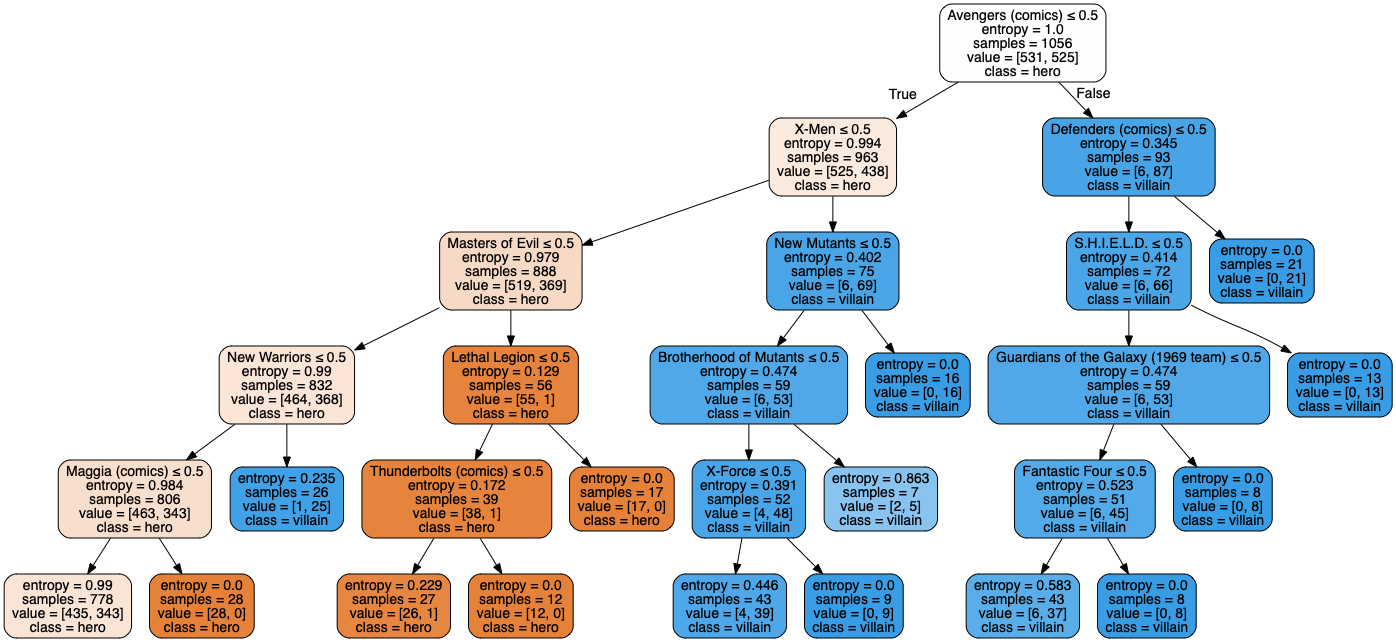

## Logistic Regression

<div class="alert alert-block alert-info">
Logistic regressions are great baseline models for comparing how well a more complicated model works.
They are literally just linear regressions where the output is <i>squeezed</i> through a <b>sigmoid</b> function,
so the returned value is between 0 and 1 (which can be interpreted as a probability).
</div>

In [43]:
def linear_regression(x, w0, w1, w2):
    return x[0] * w0 + x[1] * w1 + w2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(x, w0, w1, w2):
    return sigmoid(linear_regression(x, w0, w1, w2))
    


<div class="alert alert-block alert-info">
Fit a logistic regression. Use the <b>scipy</b> module <b>scipy.optimize.curve_fit</b> to fit a model to some data.
</div>

In [44]:
from scipy.optimize import curve_fit
import numpy as np

def generate_X_linear(N=200):
    """A little function that creates some data."""
    x = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2))
    
    return x, y

# Generate input and output data
x, y = generate_X_linear()

optimal_params1, cov_params1 = curve_fit(linear_regression, x.T, y)
optimal_params2, cov_params2 = curve_fit(logistic_regression, x.T, y)

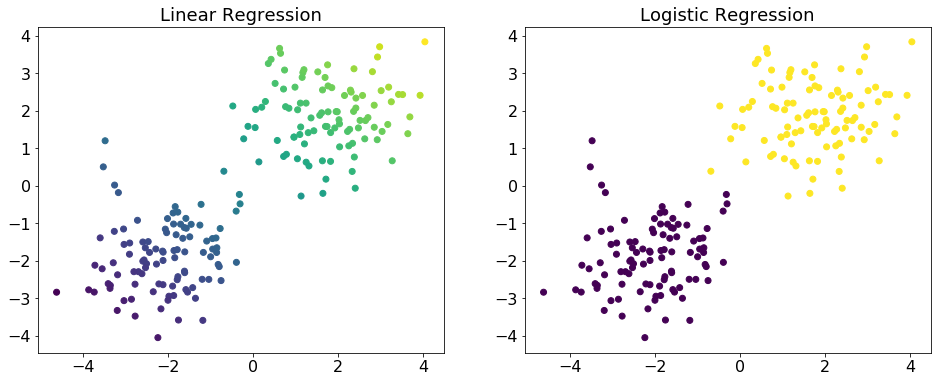

In [45]:
import matplotlib.pylab as plt

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(x[:, 0], x[:, 1], c=[linear_regression(x_, *optimal_params1) for x_ in x])
plt.title("Linear Regression", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
plt.scatter(x[:, 0], x[:, 1], c=[logistic_regression(x_, *optimal_params2) for x_ in x])
plt.title("Logistic Regression", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# Networks

## Neural Networks

<div class="alert alert-block alert-info">
Classify some points with small non-linear PyTorch neural network.
</div>

In [47]:
import torch

def generate_X_nonlinear(N=200, R=5):

    X_inner = torch.randn(int(N/2), 2)

    X_outer = torch.tensor([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + torch.randn(int(N/2), 2)

    X = torch.cat([X_inner, X_outer], dim=0)
   
    y = torch.cat([
        torch.zeros(int(N/2)).reshape(-1, 1),
        torch.ones(int(N/2)).reshape(-1, 1)
    ])
    
    return X, y

# Number of training datapoints
N = 500

# Generate the data (note that code is using torch arrays now)
x, y = generate_X_nonlinear(N)

In [48]:
# Defining the model

# The layers and their number of neurons
sizes = [2, 3, 1]

model = torch.nn.Sequential(
    torch.nn.Linear(sizes[0], sizes[1]),
    torch.nn.Sigmoid(),
    torch.nn.Linear(sizes[1], sizes[2]),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.MSELoss(reduction='sum')

# Hyper-parameters
learning_rate = 1e-1
epochs = 100
mini_batch_size = 100

# Optimization wrapper
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train
for t in range(epochs):
    
    # Randomly permute the row indices to get something like:
    # tensor([16214, 18491, 16308,  ..., 19629, 17565, 24696])
    permutation = torch.randperm(x.size()[0])
    
    # Start looping over the mini-batches! Each index `k` is
    # `mini_batch_size` values apart.
    for k in np.arange(0, x.size()[0], mini_batch_size):
        
        # Extract mini-batch data. The rest is the same
        mini_batch_indices = permutation[k:k+mini_batch_size]
        x_ = x[mini_batch_indices, :]
        y_ = y[mini_batch_indices, :]
        
        # Forward pass
        y_pred = model(x_)

        # Compute loss
        loss = loss_fn(y_pred, y_)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers (i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        
        
    # Print progress (here evaluating on all the data so we can compare)
    if t % 10 == 0:
        loss = loss_fn(model(x), y)
        print(t, "train:", loss.item())



0 train: 124.43022155761719
10 train: 33.420345306396484
20 train: 12.317337989807129
30 train: 9.977109909057617
40 train: 9.036421775817871
50 train: 8.487876892089844
60 train: 8.3526029586792
70 train: 7.983612060546875
80 train: 8.104348182678223
90 train: 7.6876020431518555


<div class="alert alert-block alert-info">
Visualize the model's predictions.
</div>

In [49]:
%matplotlib inline
from scipy.interpolate import interp1d
import matplotlib.pylab as plt

class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

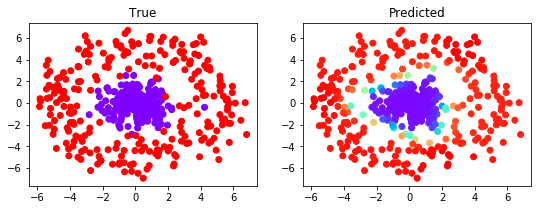

In [50]:
cmap = cmap_in_range([0, 1])

y_true = y.reshape(-1).numpy()
y_pred = model(x).data.numpy().reshape(-1)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("True", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], color=list(map(cmap, y_true)))

plt.subplot(1, 2, 2)
plt.title("Predicted", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], color=list(map(cmap, y_pred)))
plt.show()

## Social Networks

<div class="alert alert-block alert-info">
<ol>
<li> Create a <b>networkx.Graph</b> that represents each partnership between characters, as an edge. </li>
<li> Print the number of nodes, edges and average degree of the resulting network. </li>
</ol>
</div>

In [51]:
import networkx as nx
import re, os

# Function to find the partners for a given character
def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

In [56]:
import numpy as np

# Find all characters with Wikipedia pages
nodes = []
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("%s" % faction)]
    nodes = faction_chars + nodes
    
# Create graph and add characters
G = nx.Graph()
G.add_nodes_from(nodes)

# Find partnerships for each character and insert an edge between each character and their partners
for c in nodes:
    p = get_partners(c)
    for pi in p:
        G.add_edge(c, pi)
        
# Find the degrees of each node in the graph
d_n = list(G.degree)
d = [d_n[x][1] for x in range(len(d_n))]

# Print out results (in a nicely formatted table!)
print("        RESULTING GRAPH        ")
print("-" * 31)
print("| Number of nodes:  |    " + str(len(G.nodes)) + " |")
print("| Number of edges:  |     " + str(len(G.edges)) + " |")
print("| Average degree:   |   "  + str(np.round(np.mean(d), 4)) + " |")
print("-" * 31)

        RESULTING GRAPH        
-------------------------------
| Number of nodes:  |    1890 |
| Number of edges:  |     429 |
| Average degree:   |   0.454 |
-------------------------------


<div class="alert alert-block alert-info">
Make a nice plot of the network using a Python library called Netwulf that allows you to interactively plot networks in Python.
</div>

In [ ]:
from netwulf import visualize

visualize(G)

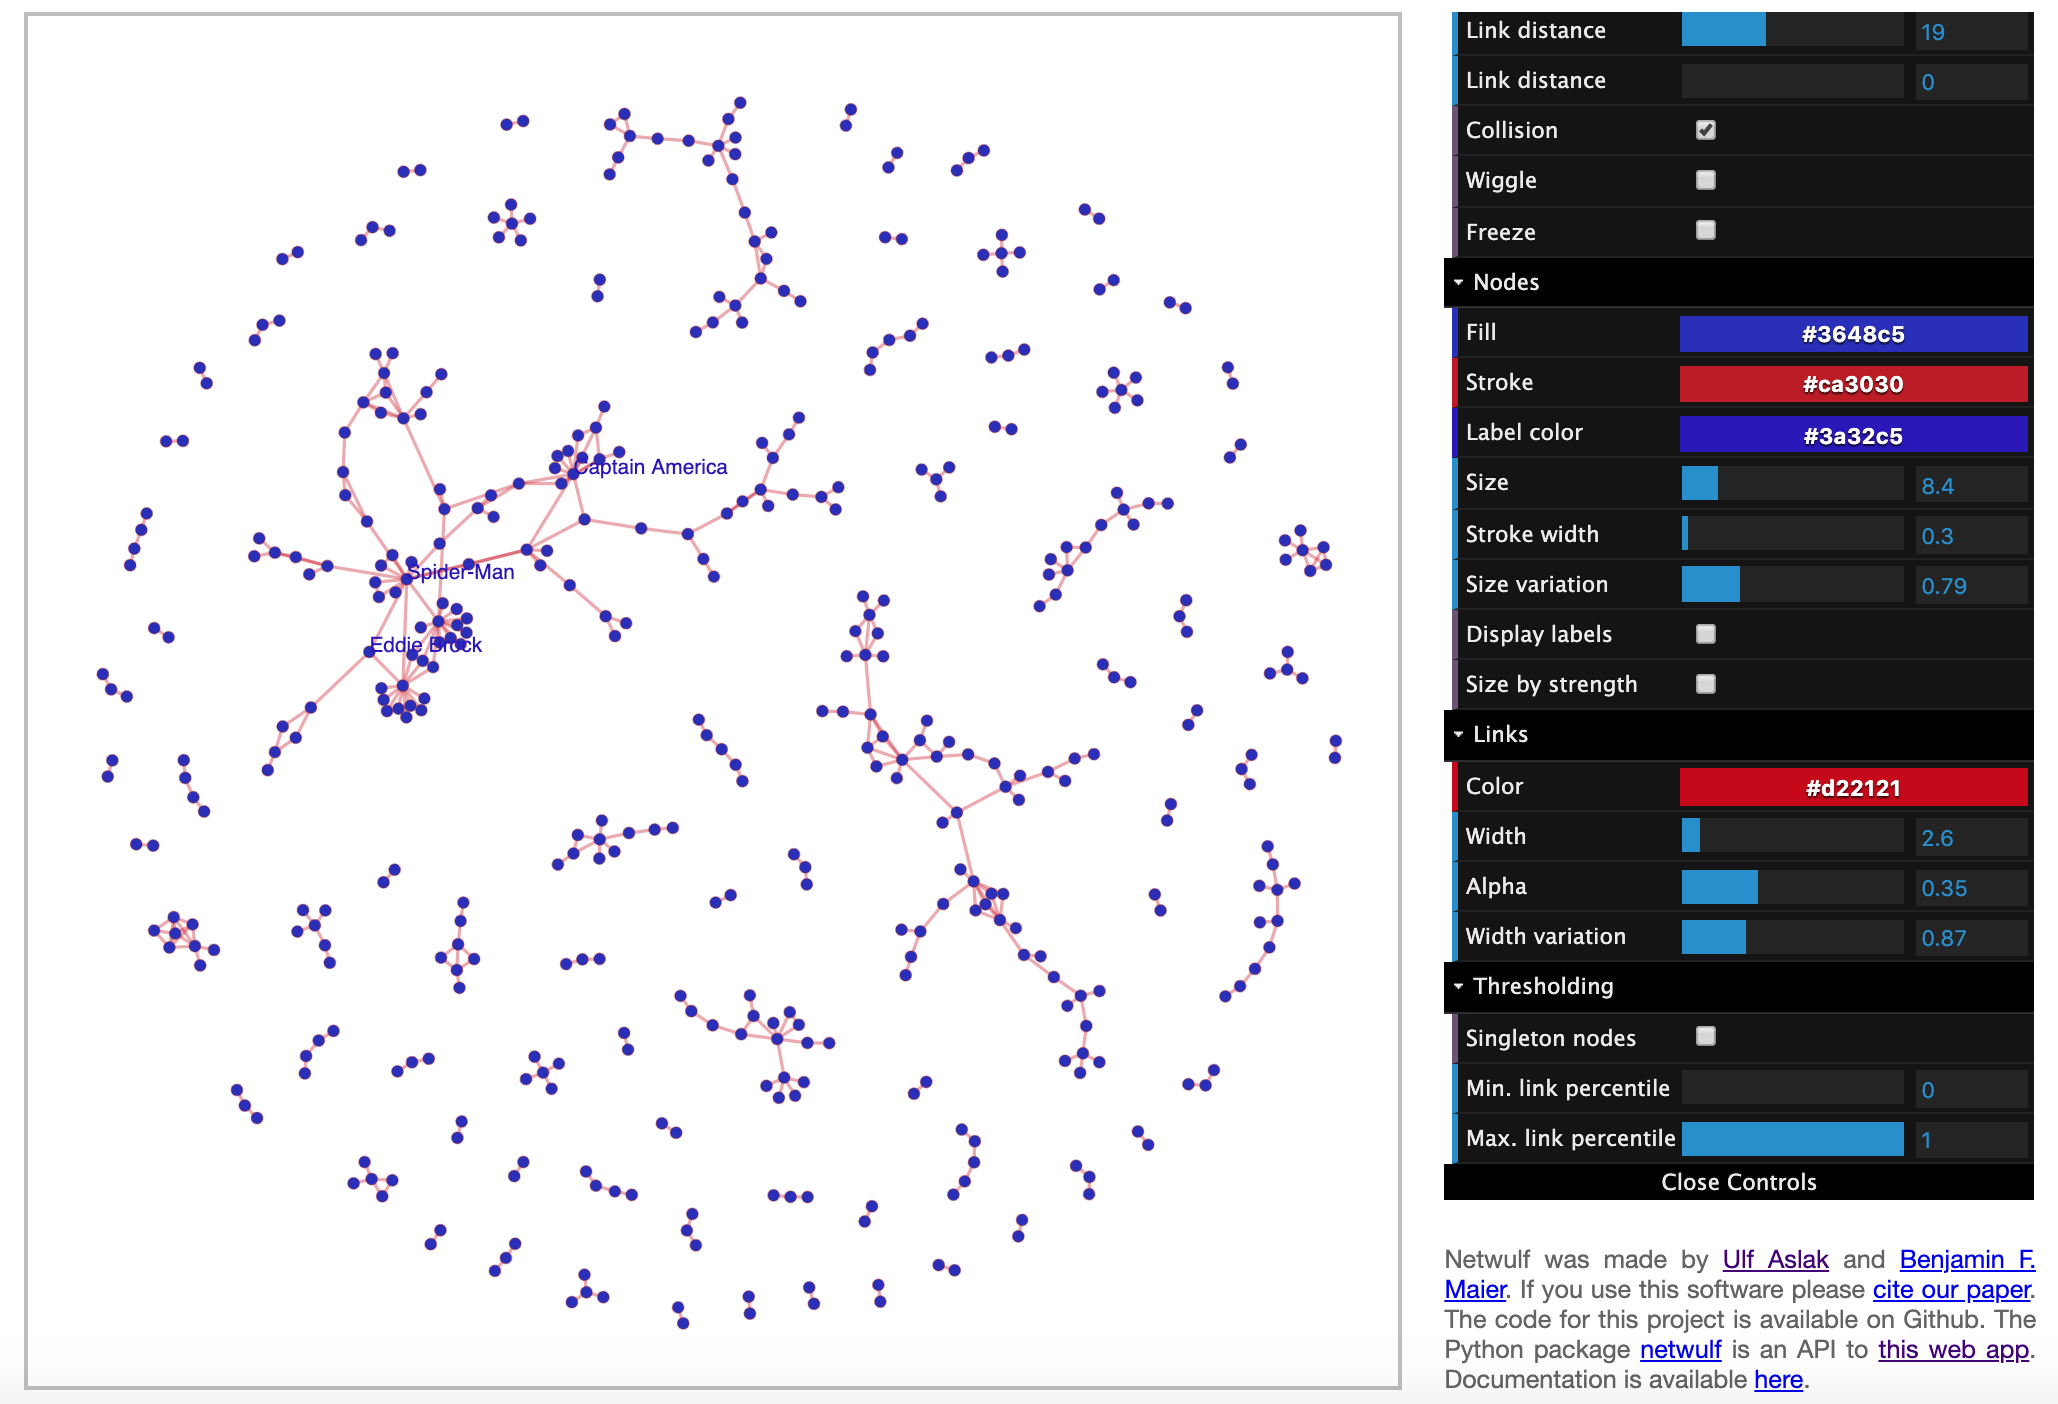

# Natural Language Processing

<div class="alert alert-block alert-info">
Compute the sentiment score of each character's page and produce three histograms of sentiment scores, one for each faction.
</div>

In [57]:
import os

# Function to get list of character names to clean from the markup
def get_character_names():
    c = []
    factions = ["heroes", "villains", "ambiguous"]
    for fac in factions:
        for f in os.listdir("%s" % fac):
            char = f[:-4].lower().replace('(', '').replace(')', '').split()
            c = c + char
    return list(set(c))

c = get_character_names()

In [60]:
import re
import nltk

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

# Function to "clean" a character's markdown
def get_clean_words(character_filename, faction):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    with open("%s/%s" % (faction, character_filename)) as fp:
        markup = fp.read()

    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', markup)

    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove character names
    words = [w for w in words if w not in c]
    
    # Remove junk
    stupid_stuff = ["ref", "name", "www", "http", "https", "com"]
    words = [w for w in words if w not in stupid_stuff]
    
    # Remove all singular characters
    words = [w for w in words if len(w) > 1]
    
    # Remove all words with underscores
    words = [w for w in words if "_" not in w]
    
    # Remove all words with numbers
    words = [w for w in words if not any(char.isdigit() for char in w)]
    
    # Remove all Marvel and Comics words
    marvel = ["(marvel", "comics)", "comics"]
    words = [w for w in words if w not in marvel]

    return words

In [61]:
# Function to create a list of markups for a given faction 
def get_faction_words(faction):
    w1 = []
    for f in os.listdir("%s" % faction):
        w = get_clean_words(f, faction)
        w1.append(w)
    return w1
        
# Get markup lists for each faction
h_m = get_faction_words("heroes")
v_m = get_faction_words("villains")
a_m = get_faction_words("ambiguous")
markups = [h_m, a_m, v_m]

In [68]:
# some examples of afinn

from afinn import Afinn
afinn = Afinn()
print(afinn.score('good'))
print(afinn.score('bad'))
print(afinn.score('miserable'))
print(afinn.score('glee'))
print(afinn.score('death'))
print(afinn.score('bliss'))
print(afinn.score('wonderful'))
print(afinn.score('avocado'))

3.0
-3.0
-3.0
3.0
-2.0
3.0
4.0
0.0


In [62]:
# functon calculate the affinity scores for a list of list of markups
def get_affinity_scores():
    afinn_scores = [[],[],[]]
    afinn = Afinn()
    for i in range(len(markups)):
        for j in range(len(markups[i])):
            afinn_scores[i].append(afinn.score(' '.join(markups[i][j])) / len(markups[i][j]))
    return afinn_scores

# further normalizes the data by not including jibberish / neutral words with an affinity score of 0.0
def get_affinity_scores2():
    afinn_scores = [[],[],[]]
    afinn = Afinn()
    for i in range(len(markups)):
        for j in range(len(markups[i])):
            a_scores = [afinn.score(word) for word in markups[i][j] if afinn.score(word) != 0]
            if len(a_scores) > 0:
                afinn_scores[i].append(sum(a_scores) / len(a_scores))
    return afinn_scores

scores = get_affinity_scores()
scores2 = get_affinity_scores2()

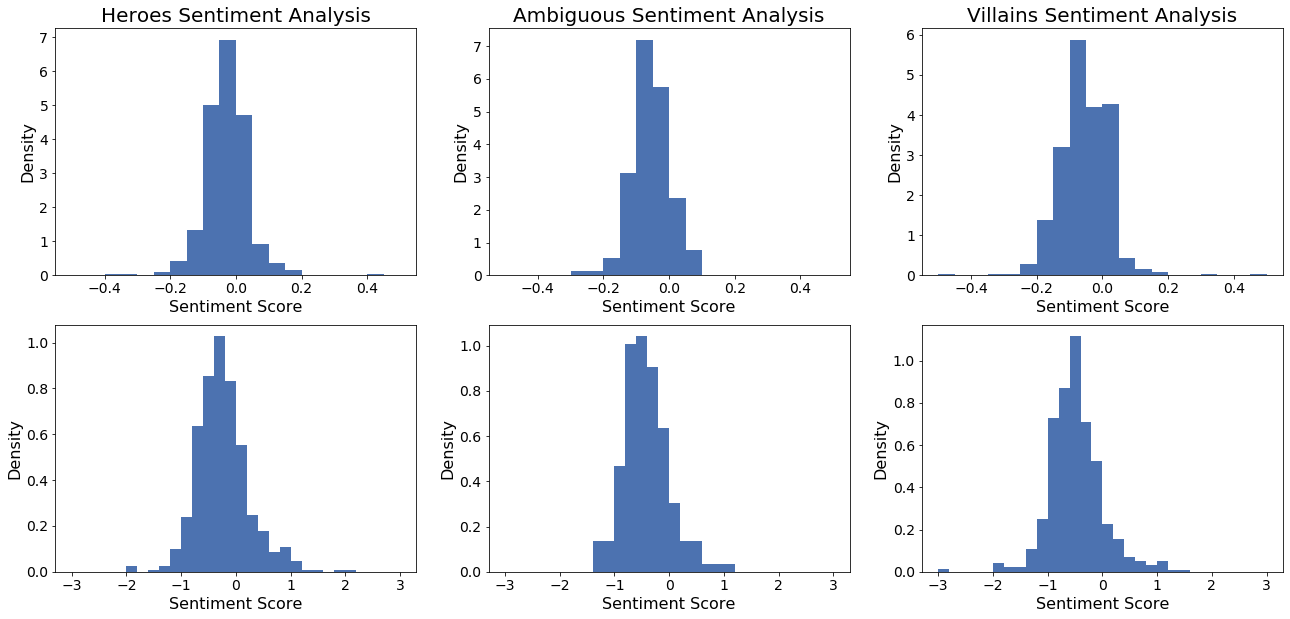

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
factions = ["Heroes", "Ambiguous", "Villains"]
bins = np.linspace(-0.5, 0.5, 21)
bins2 = np.linspace(-3, 3, 31)

# modular function for histogram plot formatting
def plot_hist(scores, bins):
    plt.hist(scores[i], bins, density=True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Sentiment Score', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    
for i in range(3):
    plt.subplot(2, 3, i+1)
    plot_hist(scores, bins)
    plt.title(factions[i] + " Sentiment Analysis", fontsize=20)
    plt.subplot(2, 3, i+4)
    plot_hist(scores2, bins2)
    
plt.show()

# Map-Reduce

<div class="alert alert-block alert-info">
Count the number of characters, words, and lines in a file.
</div>

<div class="alert alert-block alert-success" markdown=1>

THE CODE:
    
```python
from mrjob.job import MRJob

class MRWordCounter(MRJob):  

    def mapper(self, _, line):
        yield "char", len(line) + 1
        yield "line", 1
        for word in line.split():
            yield "word", 1

    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    MRWordCounter.run()
```
    
 </div>


<div class="alert alert-block alert-success">
THE OUTPUT:
    
    --MacBook-Pro-2:big-data -$ python stat_report.py twitter.txt
    No configs found; falling back on auto-configuration
    No configs specified for inline runner
    Creating temp directory /var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/stat_report.-.20191107.171214.923173
    Running step 1 of 1...
    job output is in /var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/stat_report.-.20191107.171214.923173/output
    Streaming final output from /var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/stat_report.-.20191107.171214.923173/output...
    "word"	21
    "line"	4
    "char"	92
    Removing temp directory /var/folders/qt/kh_gt5vd5vq1g7vbl8lk25zh0000gn/T/stat_report.-.20191107.171214.923173...
</div>